In [1]:
id 고유 id
hour 시간
temperature 기온
precipitation 비가 오지 않았으면 0, 비가 오면 1
windspeed 풍속(평균)
humidity 습도
visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
ozone 오존
pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
count 시간에 따른 따릉이 대여 수

SyntaxError: invalid syntax (3869936266.py, line 1)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/train.csv')

df.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [12]:
df.shape

(1459, 11)

In [13]:
data_x = df.drop("count",axis=1).fillna(0)
data_x

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0
...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0


In [14]:
data_y = df["count"]
data_y

0        49.0
1       159.0
2        26.0
3        57.0
4       431.0
        ...  
1454     21.0
1455     20.0
1456     22.0
1457    216.0
1458    170.0
Name: count, Length: 1459, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.30, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 10)
(438, 10)
(1021,)
(438,)


In [260]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

slr = Ridge(alpha =5, random_state = 1)
poly = PolynomialFeatures(degree = 2, interaction_only = False, include_bias=True)
sc = StandardScaler()
pca = PCA(n_components = 8)

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)



In [261]:
poly.fit(X_train_pca)
lr_x=poly.transform(X_train_pca)
slr.fit(lr_x, y_train)
y_pred = slr.predict(lr_x)

In [262]:
lr_x

array([[ 1.00000000e+00,  7.92539148e-02, -6.84493612e-01, ...,
         2.48331569e-01, -3.94431114e-02,  6.26484601e-03],
       [ 1.00000000e+00, -2.64240204e+00, -9.52428995e-01, ...,
         2.23831038e-01, -2.03128070e-03,  1.84339997e-05],
       [ 1.00000000e+00, -1.98498952e+00,  1.51569693e+00, ...,
         1.87756184e-01,  3.63801946e-01,  7.04913432e-01],
       ...,
       [ 1.00000000e+00,  2.93571461e-01,  1.02446459e+00, ...,
         8.85453151e-02, -2.36258762e-02,  6.30391373e-03],
       [ 1.00000000e+00, -1.19102888e+00, -9.73494403e-01, ...,
         7.22509882e-03, -1.54945966e-02,  3.32289607e-02],
       [ 1.00000000e+00, -1.01243902e+00,  5.39289793e+00, ...,
         3.58785549e-01,  7.49470847e-01,  1.56557741e+00]])

In [263]:
slr.coef_

array([ 0.00000000e+00, -3.10400696e+01,  3.81458490e+00,  1.98756330e+01,
        2.51717536e+00, -1.79461536e+01, -1.25943102e+01, -2.00273772e+01,
        8.55533909e+00,  4.32896464e+00, -1.33544774e+00, -2.60901972e+00,
       -4.02683082e-01,  9.37120539e+00,  3.24543529e+00,  1.70165331e+00,
        4.33067756e+00,  6.84032306e-03, -1.05414153e+00,  7.89260249e-01,
       -1.06017891e+00,  2.98893200e-01,  1.42066076e+00, -7.34564433e-01,
       -3.03808666e+00,  1.01231072e+00, -4.37539682e+00,  1.75963555e+00,
        3.33951204e-01, -1.06565353e+00, -2.51549374e+00,  3.43756553e-01,
        2.94363646e+00,  1.95488211e+00, -2.39863817e+00, -1.06939167e+00,
        4.44199810e+00,  5.22126349e+00,  2.14394610e+00, -8.10754689e+00,
       -4.19331997e+00, -8.04595338e+00, -5.18995613e+00, -6.55517185e-01,
       -1.93185432e+00])

In [264]:
slr.intercept_

112.83018389840545

In [265]:
lr_test = poly.transform(X_test_pca)
y_predict = slr.predict(lr_test)
y_predict.shape

(438,)

In [266]:
result = pd.DataFrame({'Actual' : y_test.values.flatten(), 'Predicted' : y_predict})
result

,Actual,Predicted
0,134.0,155.950074
1,65.0,60.447467
2,67.0,36.508489
3,216.0,209.987607
4,80.0,36.404204
...,...,...
433,78.0,106.996709
434,12.0,17.556544
435,133.0,185.283287
436,90.0,19.986296


In [267]:
diff=(result['Actual'] - result['Predicted'])
SE = diff * diff.T
RMSE = SE.mean()**(1/2)
print(RMSE)

46.239194866017215


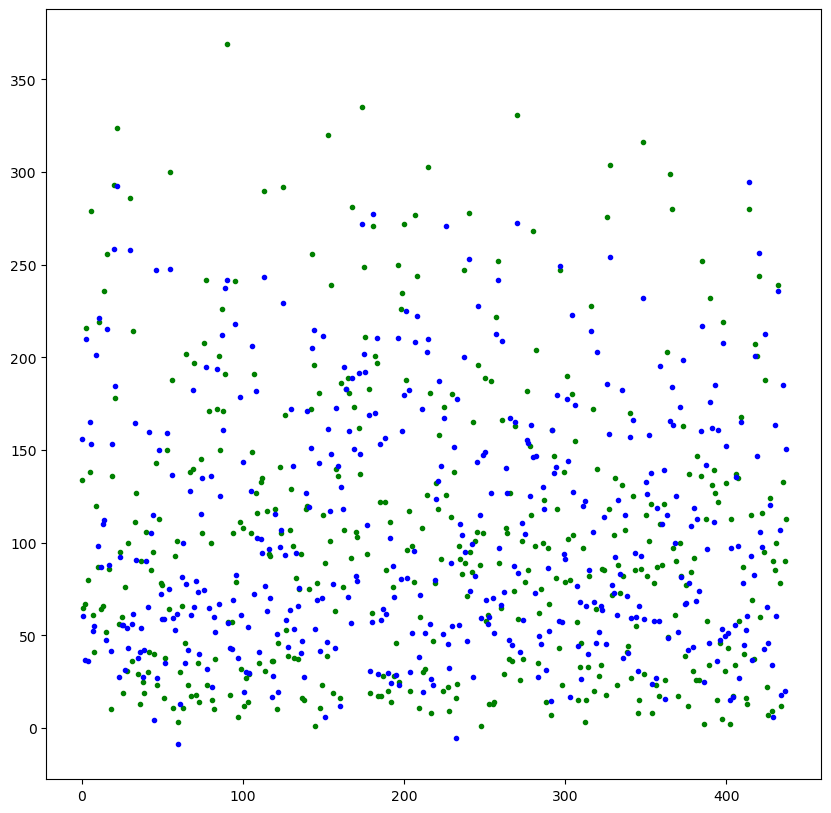

In [268]:
plt.figure(figsize = (10, 10))
plt.plot(result['Actual'], 'g.')
plt.plot(result['Predicted'], 'b.')
plt.show()

In [276]:
df_test = pd.read_csv('data/2020.AI.bike-test.csv').fillna(0)
result_predict = slr.predict(poly.transform(pca.transform(sc.transform(df_test))))
df_result = pd.DataFrame(columns = ['id','count'])
df_result["id"] = range(327)
df_result["count"] = result_predict

df_result.to_csv("houseprice.csv", index = False)